In [ ]:
# Import libararies and Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [5]:
with open("pickles/train.p", mode = 'rb') as training_data:
    train = pickle.load(training_data)
with open("pickles/valid.p", mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)  
with open("pickles/test.p", mode = 'rb') as testing_data:
    test = pickle.load(testing_data)

In [6]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

In [9]:
X_test.shape

(12630, 32, 32, 3)

In [10]:
y_test.shape

(12630,)

In [11]:
# Image Exploration

41

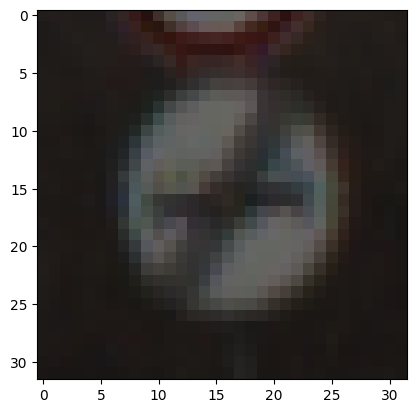

In [17]:
i = 8
plt.imshow(X_train[i])
y_train[i]

In [18]:
# Data Preparation

In [19]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [20]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [21]:
X_train_gray.shape

(34799, 32, 32, 1)

In [22]:
X_train_gray_norm = (X_train_gray -128)/128
X_test_gray_norm = (X_test_gray -128)/128
X_validation_gray_norm = (X_validation_gray -128)/128

In [24]:
X_train_gray_norm

array([[[[-0.61979167],
         [-0.6171875 ],
         [-0.61979167],
         ...,
         [-0.57552083],
         [-0.546875  ],
         [-0.54427083]],

        [[-0.61979167],
         [-0.61979167],
         [-0.625     ],
         ...,
         [-0.50260417],
         [-0.47916667],
         [-0.4765625 ]],

        [[-0.51041667],
         [-0.50520833],
         [-0.5       ],
         ...,
         [-0.2890625 ],
         [-0.40625   ],
         [-0.4375    ]],

        ...,

        [[-0.38020833],
         [-0.5859375 ],
         [-0.65364583],
         ...,
         [-0.04166667],
         [-0.02083333],
         [ 0.05208333]],

        [[-0.40104167],
         [-0.58072917],
         [-0.65104167],
         ...,
         [-0.234375  ],
         [-0.31510417],
         [-0.29427083]],

        [[-0.40625   ],
         [-0.56510417],
         [-0.66145833],
         ...,
         [-0.56510417],
         [-0.52864583],
         [-0.44791667]]],


       [[[-0.5078125 ],


<Figure size 640x480 with 0 Axes>

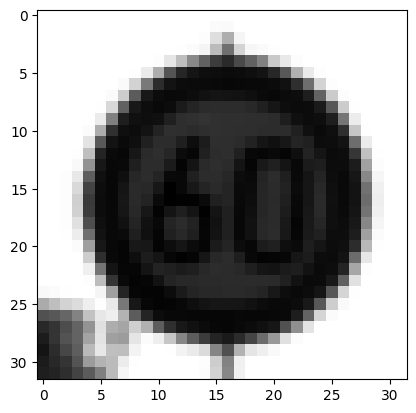

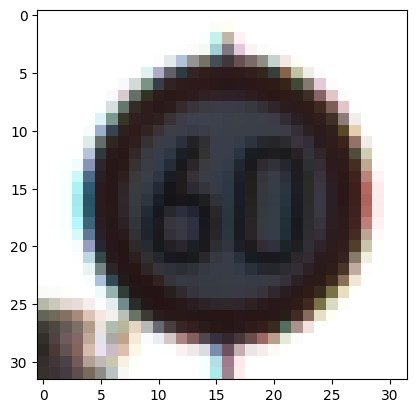

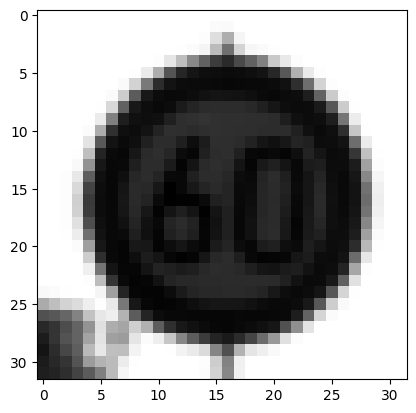

<Figure size 640x480 with 0 Axes>

In [29]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray' )
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray' )
plt.figure()



In [30]:
# Model Training

<Figure size 640x480 with 0 Axes>

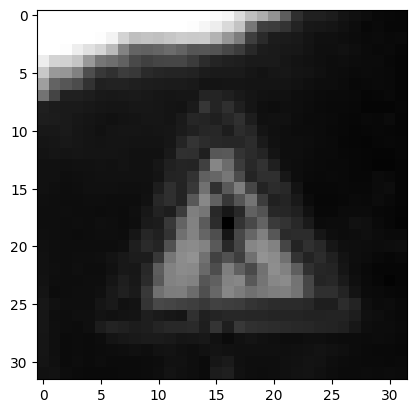

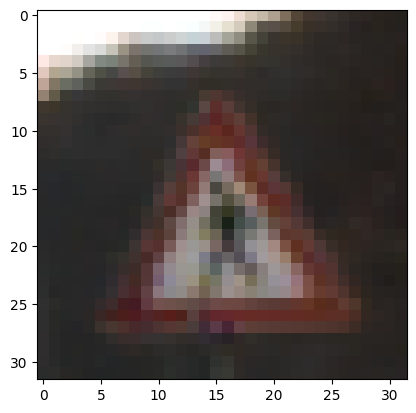

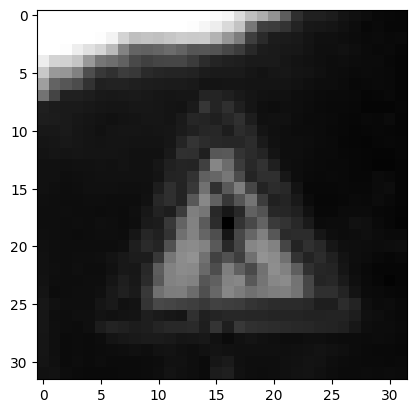

<Figure size 640x480 with 0 Axes>

In [33]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray' )
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray' )
plt.figure()

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

2024-07-21 19:31:12.170790: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-21 19:31:12.174170: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-21 19:31:12.183908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 19:31:12.199008: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 19:31:12.203109: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-21 19:31:12.213540: I tensorflow/core/platform/cpu_feature_gu

In [38]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=6, kernel_size=(5,5), activation = 'relu', input_shape = (32,32,1))) 
cnn_model.add(AveragePooling2D(pool_size=(5,5)))
cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))
cnn_model.add(Dense(units = 43, activation = 'softmax'))

In [45]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])

In [46]:
history = cnn_model.fit(X_train_gray_norm,
              y_train,
              batch_size = 500,
              epochs = 50,
              verbose = 1,
              validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50


2024-07-21 19:42:15.818729: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 142536704 exceeds 10% of free system memory.


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.0710 - loss: 3.5754 - val_accuracy: 0.1501 - val_loss: 3.3988
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.2291 - loss: 2.9238 - val_accuracy: 0.2696 - val_loss: 2.7826
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4070 - loss: 2.1947 - val_accuracy: 0.3825 - val_loss: 2.2424
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5411 - loss: 1.6585 - val_accuracy: 0.4964 - val_loss: 1.7941
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6212 - loss: 1.3173 - val_accuracy: 0.5560 - val_loss: 1.5685
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6930 - loss: 1.0881 - val_accuracy: 0.6156 - val_loss: 1.3478
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7299 - loss: 0.9460 - val_accuracy: 0.6302 - val_loss: 1.2718
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7569 - loss: 0.8549 - val_accuracy: 0.6590 - val_loss: 1.

In [47]:
 # Model Evaluation

In [48]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy {}'.format(score[1]))

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7831 - loss: 1.3495
Test Accuracy 0.783847987651825


In [49]:
y_test.shape

(12630,)

In [50]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [51]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

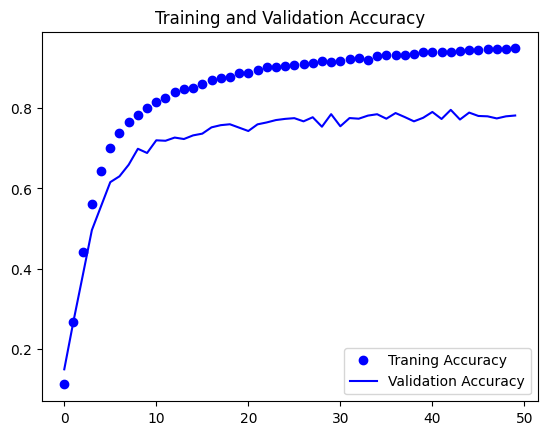

In [52]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Traning Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

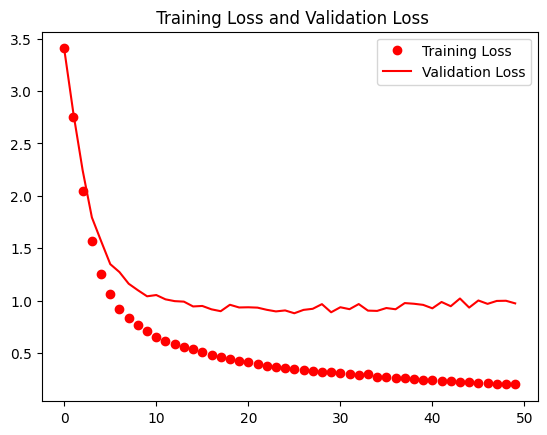

In [53]:
epochs = range(len(loss))
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title(' Training Loss and Validation Loss')
plt.legend()

In [54]:
predict_x=cnn_model.predict(X_test_gray_norm) 
classes_x=np.argmax(predict_x,axis=1)
y_true = y_test

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

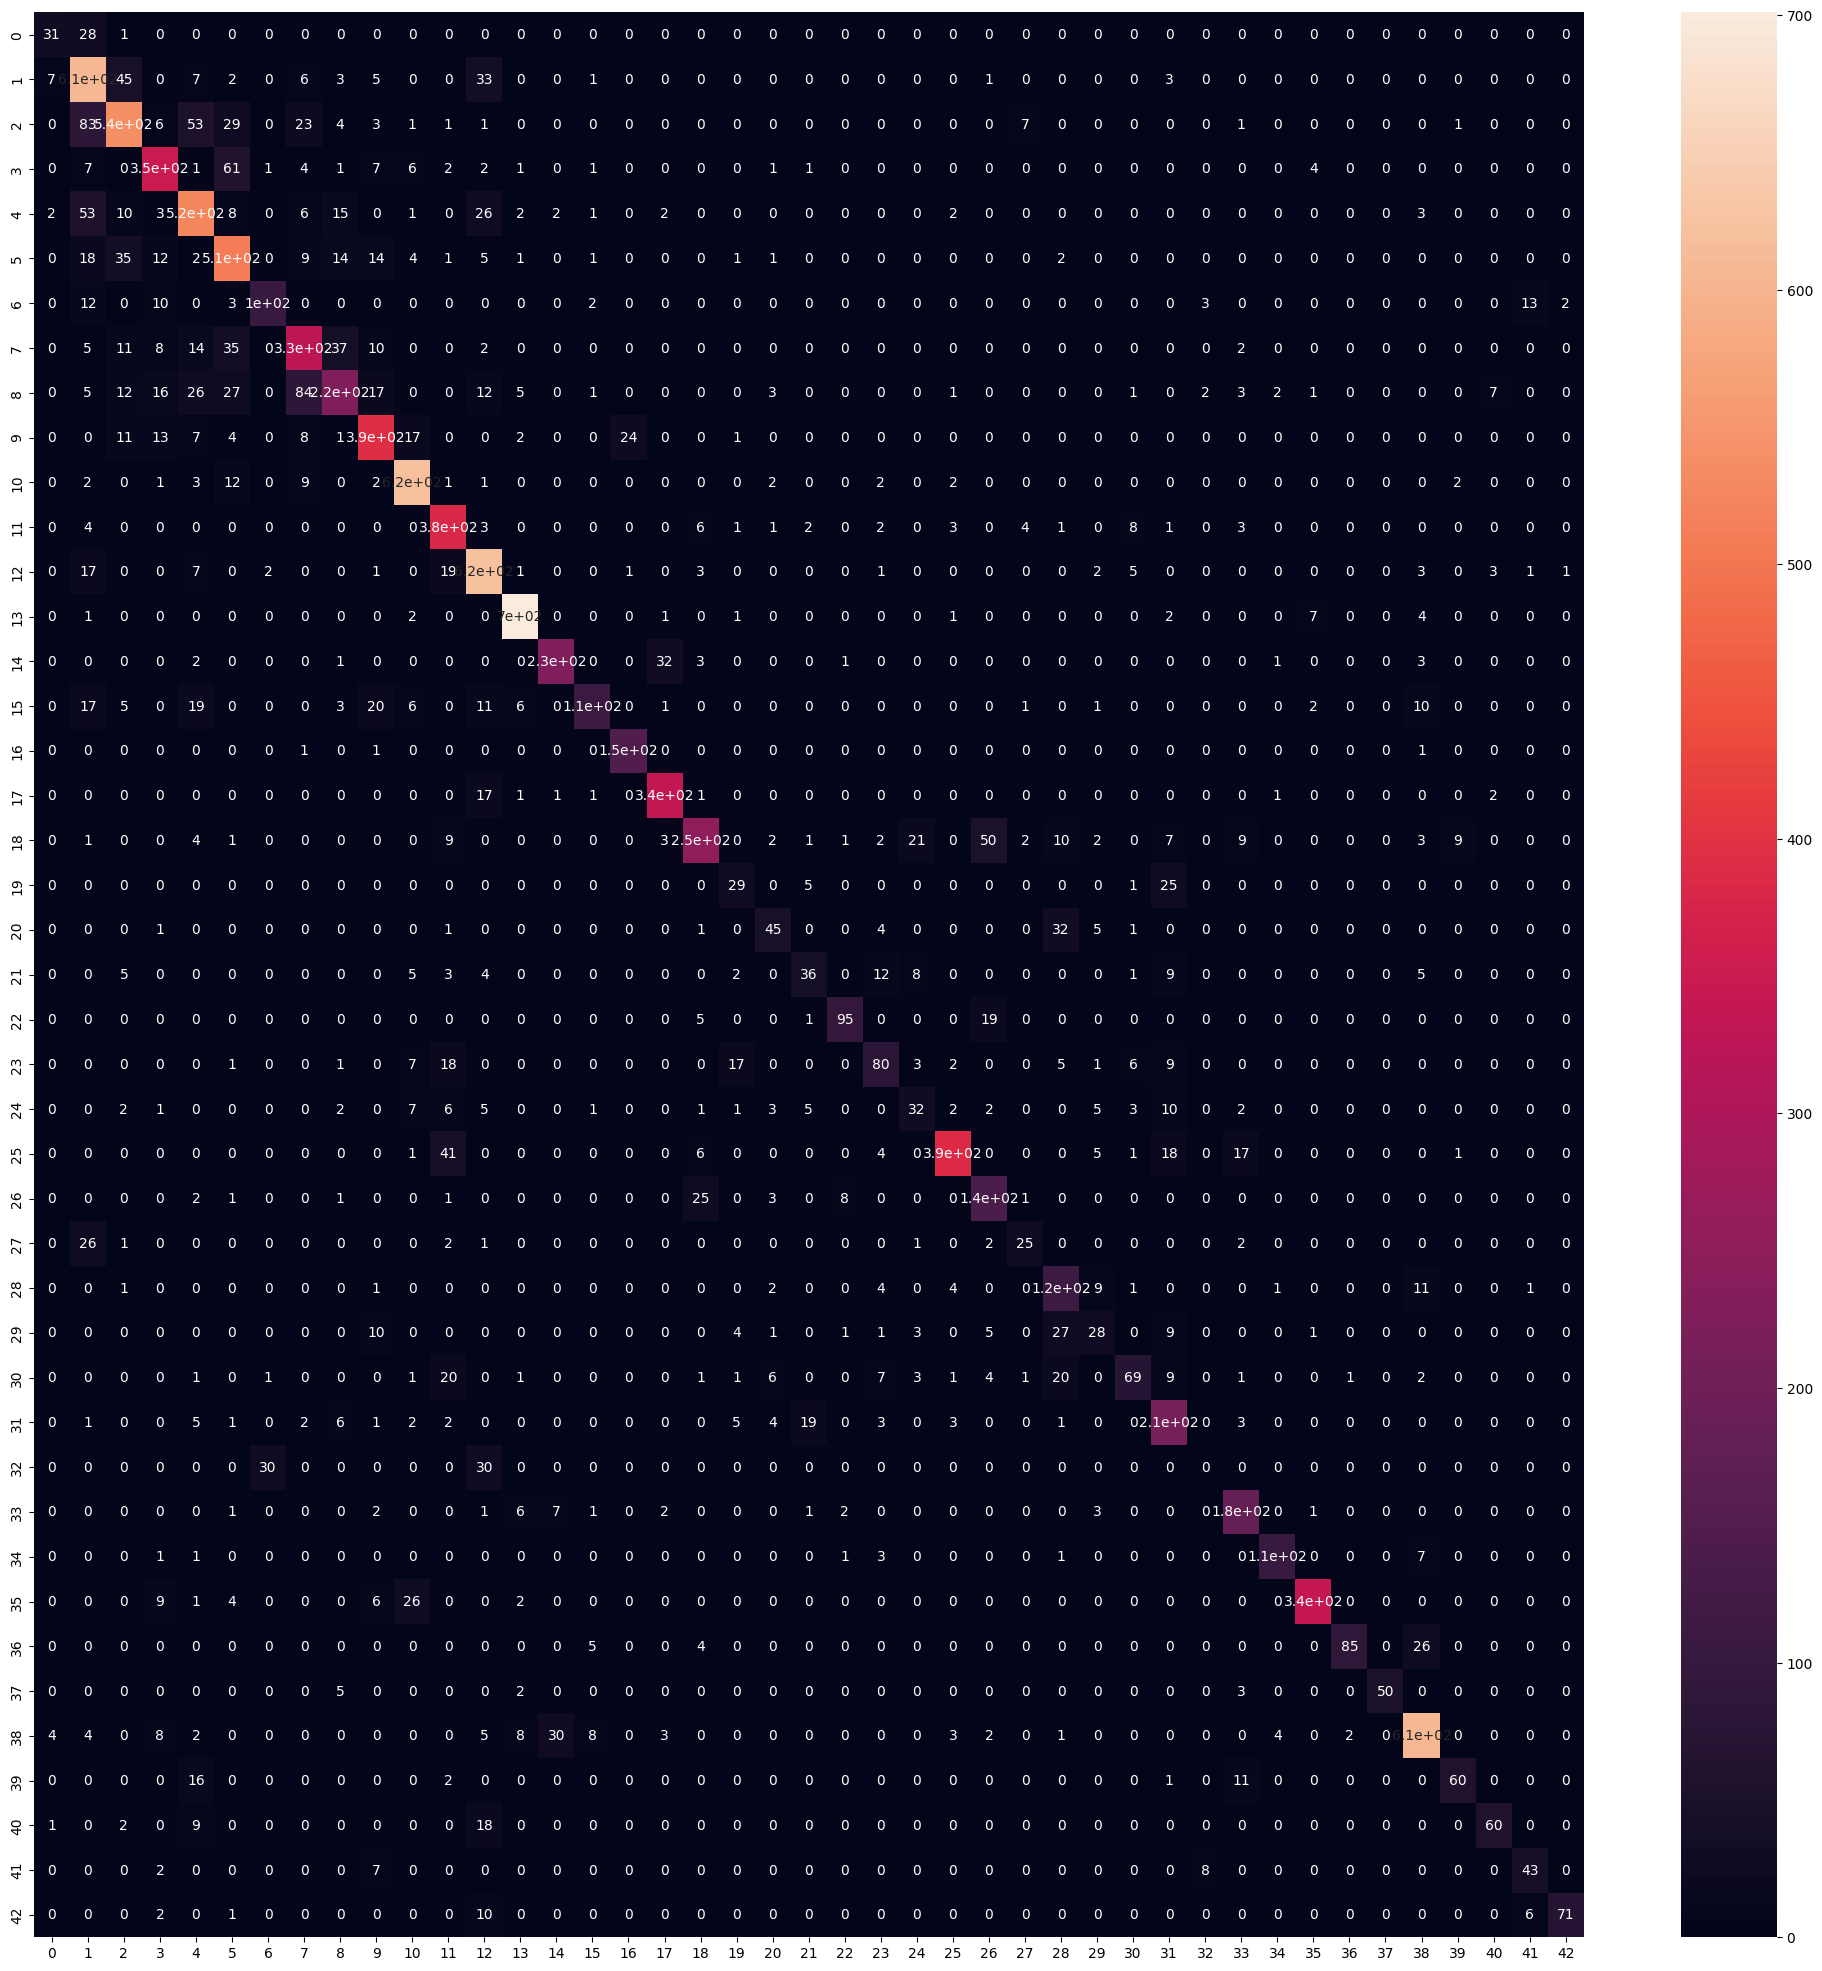

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, classes_x)
plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True)

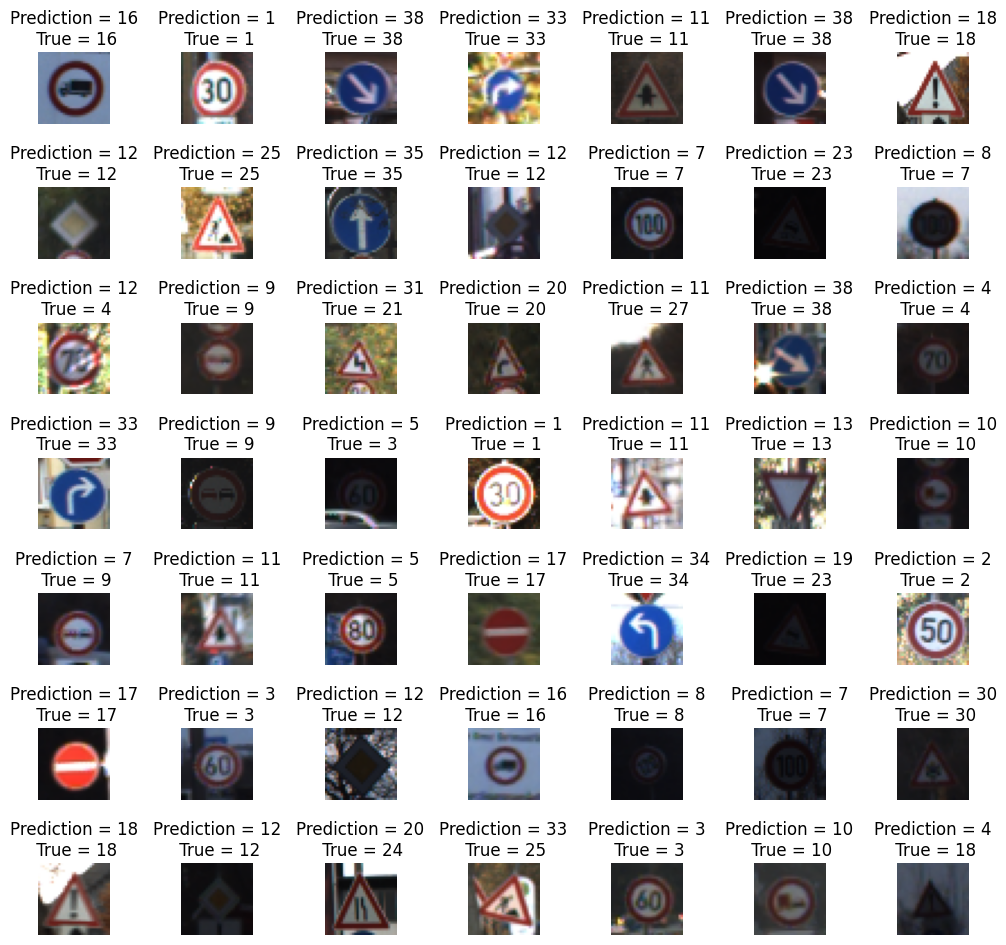

In [56]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(classes_x[i], y_true[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)